<a href="https://colab.research.google.com/github/KyoungmiKwon/Bigdata_Training_at_ITwill/blob/main/Team_Project/C04_KM_Word2Vec_TF_IDF_Doc2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mecab 설치

In [1]:
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backpor

In [2]:
%env JAVA_HOME "/user/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/user/lib/jvm/java-8-openjdk-amd64"


In [3]:
%%bash
bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
pip3 install /tmp/mecab-python-0.996

Installing automake (A dependency for mecab-ko)
Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:4 http://security.ubuntu.com/ubuntu bionic-security InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:14 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:15 http://ppa.l

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 5.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1381k  100 1381k    0     0  6196k      0 --:--:-- --:--:-- --:--:-- 6196k
./configure: line 7378: /usr/bin/file: No such file or directory
In file included from viterbi.cpp:14:0:
param.h:30:13: warning: 'Target {anonymous}::lexical_cast(Source) [with Target = std::__cxx11::basic_string<char>; Source = std::_

In [4]:
!git clone https://github.com/entelecheia/eKoNLpy.git

Cloning into 'eKoNLpy'...
remote: Enumerating objects: 3590, done.
remote: Total 3590 (delta 0), reused 0 (delta 0), pack-reused 3590
Receiving objects: 100% (3590/3590), 73.30 MiB | 23.69 MiB/s, done.
Resolving deltas: 100% (2618/2618), done.


In [5]:
!pip install /content/eKoNLpy

Processing ./eKoNLpy
  Created wheel for eKoNLPy: filename=eKoNLPy-0.5.30-cp37-none-any.whl size=14437140 sha256=2a8ab193e5c795982d8542a98921bd014b35b97cd9247fc9943465d3479d5ec0
  Stored in directory: /tmp/pip-ephem-wheel-cache-4h1ctcuu/wheels/42/07/b6/a197e00efdc4534f4c1d281bd028c47764df1a63a8b311aa3d
Successfully built eKoNLPy


# import

In [148]:
import konlpy
from ekonlpy.tag import Mecab

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import logging # word2vec 학습과정에서 로그 메세지를 양식에 맞는 info 수준으로 볼 수 있다.
from gensim.models import word2vec

from sklearn.feature_extraction.text import TfidfVectorizer #TF-IDF

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report

# 뉴스 기사 불러오기

In [7]:
data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Project/C01_KM_Data_LabelingResult.xlsx',sheet_name='Sheet2',header=0)

In [8]:
data[:1]

,No,Code,Date,Journal,Title,Text,URL,Sample Y/N,In Charge,S
0,52,5930,2021.04.13 17:50,파이낸셜뉴스,"삼성전자 사내식당 2곳, 신세계·풀무원이 운영한다",삼성전자가 사내식당 2곳에 대해 실시한 외부 급식업체 경쟁입찰에서 '신세계푸드'와 ...,https://finance.naver.com/item/news_read.nhn?a...,Y,JY,1


In [9]:
len(data)

1600

# 데이터 정제

In [10]:
# 중복기사 제거
data = data.drop_duplicates(subset=['Date', 'Text'], keep='first')

In [11]:
data.iloc[0]['Text'].split(sep='@')[0]

'삼성전자가 사내식당 2곳에 대해 실시한 외부 급식업체 경쟁입찰에서 \'신세계푸드\'와 \'풀무원푸드앤컬처\'가 운영 업체로 선정됐다고 13일 밝혔다.    삼성전자는 지난 2월, 단체급식의 다양한 메뉴와 향상된 서비스를 통해 임직원의 복리후생을 향상시키고자 수원사업장과 기흥사업장 내 사내식당 2곳에 대해 공개 입찰을 공고했다.    약 20개 업체가 참여한 이번 입찰은 서류 심사를 거쳐 △메뉴 구성과 서비스 등을 평가하는 프레젠테이션 △업체의 인프라와 위생 등을 점검하는 현장 실사 △임직원 음식 품평회까지 총 3단계에 걸친 엄격하고 공정한 절차를 통해 진행됐다. 기존에 단체급식을 공급했던웰스토리는 이 입찰에서 배제됐다.    최종 선정된 \'신세계푸드\'와 \'풀무원푸드앤컬처\'는 약 한달 반 동안 고용승계, 업무인수 등을 마친 후 6월 1일부터 운영을 시작할 예정이다. 삼성전자 관계자는 "신규 업체에 대한 임직원 만족도와 운영상 보완점 등을 검토 후에 다른 사내식당에 대해서도 경쟁입찰을 확대해 나갈 계획"이라고 말했다.  ahnman'

In [12]:
# 기사 본문 기자의 이메일 OOOO @ asdfas.com 에서 @ 전 까지의 내용으로 저장
for i in range(len(data)):
    data.iloc[i]['Text'] = data.iloc[i]['Text'].split(sep='@')[0]

# 파일 새로 저장
data.to_excel('/content/drive/MyDrive/Colab Notebooks/Project/article.xlsx',index=False)
# 다시 불러 오기
news = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Project/article.xlsx',header=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
#> 1. 기사에서 한글 제외하고 모두 제거
news['Text'] = news['Text'].str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]","") 

#> 2. 기사에서 특정품사 추출
tag_cls = ['NNG','VV+EC','XSV+EP', 'SL']
# NNG = 일반명사, VV = 동사, EC = 연결어미, XSV = 동사파생접미사, EP = 선어말 어미, SL = 외국어

mc = Mecab()
artc = []
for line in news['Text'][:]:
    temp = []  
    for word in mc.pos(line):
        if word[1] in tag_cls:
            temp.append(word[0])
    artc.append(temp)

#> 3. 불용어처리
swords = ['삼성전자','삼성','기자','인텔','신세계','풀무원','원','픽','내','마음속','억','통','곳','것','파이낸셜','뉴스','억','명','김','말','간','조선','비즈','조선비즈',
          '저작','무단','전재','배포','금지','월일','기자', 'LG전자', 'LG', 'YG', 'JYP','앤','월','일']

text = []

for tx in artc:
    temp = []
    for word in tx:
        if word not in swords:
            if len(word) >1 :       #4) 길이가 짧은 글자 제거 (optional)
                temp.append(word)
    text.append(temp)

#> Word2Vec 에서 빈도수 낮은 단어를 삭제 시키는 파라미터가 있음

In [14]:
len(text)

1592

    Word_embedding 은 단어를 벡터로 표현하는 방식
    단어를 밀집형태로 표현하는 방식을 word embeddig이라고 함
    (워드 임베딩 방법론으로는 LSA, Word2Vec, FastText, Glove 등이 있음)
    단어의 '의미'를 다차원 공간에 벡터화하는 방법을 찾게되는데, 이러한 표현 방법을 분산 표현(distributed representation)이라 함
    분산 표현(distributed representation) 방법은 기본적으로 분포 가설(distributional hypothesis)이라는 가정 하에 만들어진 표현 방법
    이 가정은 '비슷한 위치에서 등장하는 단어들은 비슷한 의미를 가진다'라는 가정
    분산 표현은 저차원에 단어의 의미를 여러 차원에다가 분산하여 표현
    이런 표현 방법을 사용하면 단어 간 유사도를 계산

# Word2Vec 벡터화
['참고 사이트'](https://devtimes.com/nb-text-classification-word2vec)


    Word2Vec에는 CBOW(Continuous Bag of Words)와 Skip-Gram 두 가지 방식
        CBOW는 주변에 있는 단어들을 가지고, 중간에 있는 단어들을 예측하는 방법
        Skip-Gram은 중간에 있는 단어로 주변 단어들을 예측하는 방법
    Word2Vec은 딥 러닝 모델(Deep Learning Model)은 아니다.
        은닉층(hidden Layer)이 1개인 경우 얕은신경망(Shallow Neural Network)
        은닉층에 활성화 함수가 존재하지 않으며 룩업 테이블이라는 연산을 담당하는 층으로 투사층(projection layer)으로 구분되어 불림

    DBOW (Continuous Bag of Words)
        윈도우(window) :중심 단어를 예측하기 위해서 앞, 뒤로 볼 단어 범위

In [15]:
# 진행 상황 나오는 log 설정
logging.basicConfig(format='%(asctime)s: %(levelname)s : %(message)s',level=logging.INFO)

In [18]:
# 학습 시 필요한 하이퍼파라미터
n_worker = 4        # 프로세스 갯수 ,defalut = 3
n_size = 600        # 워드 벡터 특정값 수 (크기),  defalut = 100
min_cnt = 2         # 단어에 대한 최소 빈도 단어 수, defalut = 5
context =  5        # 컨텍스트 윈도우의 크기, defalut = 5
d_sampling = 0.001  # 다운 샘플링 수, defalut = 0.001

    workers : 프로세스 개수, (특징) 적은 빈도 수의 단어들은 학습하지 않는다.
    size : 워드 벡터 특정 값 수 , (특징) 각 단어에 대한 임베딩된 벡터의 차원을 정한다
    min_count : 단어에 대한 최소 빈도수 단어, (특징) 적은 빈도 수의 단어들은 학습하지 않는다.
    window : 컨텍스트 윈도우 크기, 앞 뒤 5개씩 관련
    sample : 다운 샘플링 비율, (특징) word2vec 학습을 수행할 때 더 빠른 학습을 위해 정답 단어 라벨에 대한 다운 샘플링 비율을 지정. 보통 0.001이 좋은 성능을 낸다고 함 

In [ ]:
# train_val_test_set 나누기


In [20]:
# 모델 훈련
md = word2vec.Word2Vec(text,
                       workers = n_worker,
                       size = n_size,
                       min_count = min_cnt,
                       window = context,
                       sample = d_sampling)

2021-04-26 02:03:07,030: INFO : collecting all words and their counts
2021-04-26 02:03:07,033: INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-04-26 02:03:07,099: INFO : collected 11267 word types from a corpus of 256794 raw words and 1592 sentences
2021-04-26 02:03:07,101: INFO : Loading a fresh vocabulary
2021-04-26 02:03:07,121: INFO : effective_min_count=2 retains 7818 unique words (69% of original 11267, drops 3449)
2021-04-26 02:03:07,123: INFO : effective_min_count=2 leaves 253345 word corpus (98% of original 256794, drops 3449)
2021-04-26 02:03:07,151: INFO : deleting the raw counts dictionary of 11267 items
2021-04-26 02:03:07,153: INFO : sample=0.001 downsamples 40 most-common words
2021-04-26 02:03:07,155: INFO : downsampling leaves estimated 238355 word corpus (94.1% of prior 253345)
2021-04-26 02:03:07,180: INFO : estimated required memory for 7818 words and 600 dimensions: 41435400 bytes
2021-04-26 02:03:07,182: INFO : resetting layer weights

In [23]:
# 모델 저장
# 모델 이름을 하이퍼파라미터 설정 내역으로 하면 나중에 참고하기 좋음.
md_name = "4_workers__600_size__2_mincnt"
md.save(md_name)

# Word2Vec.load() 로 다시 사용가능!!

2021-04-26 02:14:39,180: INFO : saving Word2Vec object under 4_workers__600_size__2_mincnt, separately None
2021-04-26 02:14:39,183: INFO : not storing attribute vectors_norm
2021-04-26 02:14:39,187: INFO : not storing attribute cum_table
2021-04-26 02:14:39,726: INFO : saved 4_workers__600_size__2_mincnt


    하나의 리뷰에 대해 전체 단어의 평균값을 계산하는 함수를 구현 --> 리뷰 데이터 셋 처리 하는 함수 구현
        np.zero 벡터 생성 - 벡터 1개 생성 과정 효율화
        idx2word_set - 문장의 단어가 모델 단어사전에 속하지는 확인 하기 위해 객체 생성


In [50]:
def get_vector(words, model, num_features):
    """하나의 리뷰에 대해 전체 단어에 대한 개별 단어의 평균값을 계산하는 함수
    words :  리뷰 하나 (단어 모음집)
    model :  학습한 Word2Vec 모델
    num_features : Word2Vec embedding 할 때 정했던 벡터의 차원 수"""

    # 출력 벡터 초기화 - np.zero 벡터 생성
    vec = np.zeros((num_features), dtype=np.float32)

    num_words = 0
    # 어휘 사전 준비
    idx2word_set = set(md.wv.index2word)

    for w in words:
        if w in idx2word_set: # 사전에 해당하는 단어가 있으면,
            num_words = 1 
            # 해당 단어에 대해 단어 벡터를 더함 (기본값이 0이므로, 벡터값을 더해 줌으로서 단어의 벡터값으로 치환하여 주는 것임)
            vec = np.add(vec,md[w])
    
    # 문장의 단어 수 만큼 나누어 벡터의 평균값을 문장 벡터로 함
    f_vec = np.divide(vec, num_words)
    return f_vec

In [51]:
def get_vector_dataset(news, model, num_features):
    """ 리뷰 데이터 셋에 대해 리뷰 별(리뷰 하나의)평균 값을 계산하는 함수
    news  :  리뷰 데이터 셋
    model :  학습한 Word2Vec 모델
    num_features : Word2Vec embedding 할 때 정했던 벡터의 차원 수"""
    
    dataset = []

    for s in news:
        dataset.append(get_vector(s,model,num_features))

    news_vec = np.stack(dataset)
    return news_vec

In [53]:
data_vec = get_vector_dataset(text, md, 600) # (데이터셋, 모델, 임베딩 단어수)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


In [54]:
len(data_vec)

1592

In [55]:
data_vec[0]

array([  4.400096  , -21.470366  ,   1.5021528 ,  -3.9154584 ,
       -19.327038  ,  -8.668808  ,  -2.1540966 ,  -0.5729126 ,
       -16.42246   ,  -9.020342  ,  17.569527  ,  -4.178029  ,
         6.852714  ,   9.554755  ,  18.062857  ,  12.375901  ,
        -4.7428555 , -21.125319  , -12.650527  ,  14.212434  ,
         2.1951318 ,  -4.385561  ,  -3.3676972 ,   7.707048  ,
       -15.183091  ,  -2.7868629 ,  -0.08281711,  -0.4787258 ,
       -15.1538    ,   1.8388789 ,   0.45245123,  -4.3895326 ,
        -2.64332   ,  -0.12861556, -10.5177965 ,  -2.10383   ,
       -29.691742  ,   4.464306  ,  -3.9749696 ,   1.7036333 ,
         4.6542115 ,  -7.949645  ,  13.41505   ,  -5.5907607 ,
       -10.451837  ,  -7.397286  ,   6.369121  ,  -3.1387022 ,
         9.199534  ,  20.321774  ,  -9.845141  ,   0.9948293 ,
       -19.476084  , -21.600395  ,   2.5490212 ,  -7.5577803 ,
        -3.3273263 ,   9.938908  ,   6.511505  ,  -2.507437  ,
        -0.7551751 ,  -8.496722  ,   1.9792912 ,   5.25

# TF-IDF
[참고자료](https://devtimes.com/nb-text-classification-tf-idf)

    문서의 핵심어를 추출할 때 사용되는 가중치
    TF(Term Frequency, 단어의 빈도)
    IDF(역문서 빈도, Inverse Document Frequency) 
    문장에서 단어의 빈도수를 계산하되 너무 자주 등장하는 단어는 크게 의미를 두지 않도록 가중치를 낮게 줌.

        * min_df : 설정한 값보다 특정 토큰의 df값이 더 적게 나오면 벡터화 과정에서 제거
        * analyzer : 분석하기 위한 기준 단위(word:단어 하나를 단위로, char:문자 하나를 단위로)
        * sublinear_tf : 문서의 단어 빈도 수에 대한 스무딩(smoothing) 여부
        * ngram_range : 빈도의 기본 단위를 설정할 n-gram 범위
        * max_features : 각 벡터의 최대 길이

In [151]:
vectorizer = TfidfVectorizer(
            min_df = 0.0,
            analyzer = "word",
            sublinear_tf = True,
            ngram_range = (1,3),
            max_features = 600
        )

In [157]:
X_TI = vectorizer.fit_transform(list(data['Text']))

# Doc2Vec 벡터화

# 분류 모델들

## 0. 셋트 분리

In [59]:
news.columns, len(news)

(Index(['No', 'Code', 'Date', 'Journal', 'Title', 'Text', 'URL', 'Sample Y/N',
        'In Charge', 'S'],
       dtype='object'), 1592)

In [158]:
X = data_vec
y = np.array(news['S'])

X_tr, X_ts, y_tr, y_ts = train_test_split(X,y,
                                          test_size = 0.2,
                                          stratify = y)

X_tr_t, X_ts_t,y_tr_t,y_ts_t = train_test_split(X_TI,y,
                                          test_size = 0.2,
                                          stratify = y)

In [161]:
len(X_tr),len(y_tr)

(1273, 1273)

In [164]:
X_tr_t

<1273x600 sparse matrix of type '<class 'numpy.float64'>'
	with 88622 stored elements in Compressed Sparse Row format>

## 1. K- neigbors

### Word2Vec

In [127]:
knn = KNeighborsClassifier(n_neighbors = 6) # 모델 생성

In [128]:
knn.fit(X_tr,y_tr) # KNN 모델 훈련

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [129]:
knn.score(X_tr,y_tr) # 훈련 셋 평가 (훈련 셋 정확도)

0.7989002356637863

In [130]:
knn.score(X_ts,y_ts) # 테스트 셋 평가 (테스트 셋 정확도) -> 일반화 성능

0.7931034482758621

In [126]:
tr_sc_knn = []
ts_sc_knn = []

for n in range(1,10):
    knn = KNeighborsClassifier(n_neighbors = n) # 모델생성
    knn.fit(X_tr,y_tr) # KNN 모델 훈련

    # 훈련 셋 평가 (훈련 셋 정확도)
    tr_sc = knn.score(X_tr,y_tr) 
    tr_sc_knn.append(tr_sc)
    
    # 테스트 셋 평가 (테스트 셋 정확도) -> 일반화 성능
    ts_sc = knn.score(X_ts,y_ts)
    ts_sc_knn.append(ts_sc)

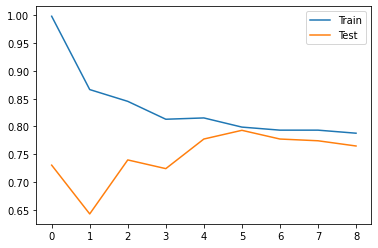

In [142]:
plt.plot(tr_sc_knn,label = 'Train')
plt.plot(ts_sc_knn, label = 'Test')
plt.legend()
plt.show()

### DF-IDF

In [169]:
tr_sc_knn = []
ts_sc_knn = []
diff = []

for n in range(1,10):
    knn = KNeighborsClassifier(n_neighbors = n) # 모델생성
    knn.fit(X_tr_t,y_tr_t) # KNN 모델 훈련

    # 훈련 셋 평가 (훈련 셋 정확도)
    tr_sc = knn.score(X_tr_t,y_tr_t) 
    tr_sc_knn.append(tr_sc)
    
    # 테스트 셋 평가 (테스트 셋 정확도) -> 일반화 성능
    ts_sc = knn.score(X_ts_t,y_ts_t)
    ts_sc_knn.append(ts_sc)

    diff.append(tr_sc - ts_sc)

In [179]:
diff.index(min(diff)), min(diff)

(7, 0.03715213734987821)

In [178]:
tr_sc_knn[7],ts_sc_knn[7],diff[7]

(0.8020424194815396, 0.7648902821316614, 0.03715213734987821)

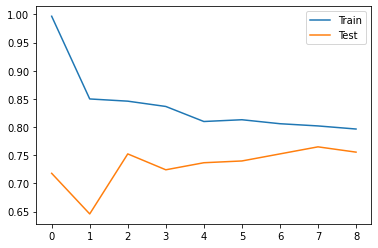

In [166]:
plt.plot(tr_sc_knn,label = 'Train')
plt.plot(ts_sc_knn, label = 'Test')
plt.legend()
plt.show()

## 2. Logistic regression

    params
    max_iter : 매개변수에서 반복 횟수. 기본값 100
    solver : 사용할 알고리즘 선택 가능 (기본값'lbfgs') https://wikidocs.net/book/1896
    penalty : 'L2' 규제(릿지 방식), 'L1' 규제(라쏘방식) 선택 가능 (기본값 l2)
    C: 규제의 강도, 작을 수록 규제가 강해짐 (기본값 1.0)
        * '규제'는 머신러닝 모델이 훈련 세트를 너무 과도하게 학습하지 못하도록 하는 것 (과대적합제한) 
            Ridge : alpha를 매개변수로 규제 강도 조절, 값이 커질 수록 규제 강해짐



In [89]:
log_reg = LogisticRegression(max_iter=1500) # 모델 생성

In [90]:
log_reg.fit(X_tr,y_tr) # 선형회귀 모델훈련

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [140]:
a = log_reg.score(X_tr,y_tr) # 훈련 셋 평가 (훈련 셋 정확도)
b = log_reg.score(X_ts, y_ts) # 테스트 셋 평가 (테스트 셋 정확도) -> 일반화 성능
print('train v test :', f'{a} vs {b}','* diff :', a - b)

train v test : 0.7926158680282797 vs 0.7899686520376176 * diff : 0.0026472159906620885


In [141]:
tr_sc_log_reg = []
ts_sc_log_reg = []

for iter in range(1200,2000,100):
    log_reg = LogisticRegression(max_iter= iter) # 모델 생성
    log_reg.fit(X_tr,y_tr) # 모델 훈련

    # 훈련 셋 평가 (훈련 셋 정확도)
    tr_sc = log_reg.score(X_tr,y_tr) 
    tr_sc_log_reg.append(tr_sc)
    
    # 테스트 셋 평가 (테스트 셋 정확도) -> 일반화 성능
    ts_sc = log_reg.score(X_ts,y_ts)
    ts_sc_log_reg.append(ts_sc)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


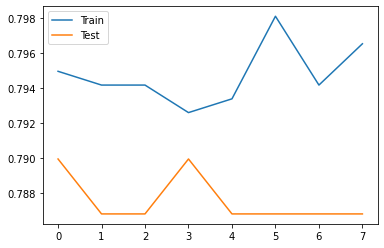

In [144]:
plt.plot(tr_sc_log_reg,label = 'Train')
plt.plot(ts_sc_log_reg, label = 'Test')
plt.legend()
plt.show()

### 참고) 모델 훈련 결과

In [92]:
# 훈련 셋 예측값
tr_prd = log_reg.predict(X_tr)
print(tr_prd[:10])
print(y_tr[:10])

[ 1  1  1  1  1 -1  1  1  1  1]
[1 1 1 1 0 1 1 1 0 1]


In [93]:
# 훈련 셋 예측 확률
tr_prob = log_reg.predict_proba(X_tr)
tr_prob[:10]

array([[0.07615539, 0.03614776, 0.88769685],
       [0.01830771, 0.24168791, 0.74000438],
       [0.00435529, 0.07105652, 0.92458818],
       [0.34979563, 0.12089201, 0.52931236],
       [0.08197869, 0.10703348, 0.81098783],
       [0.59530746, 0.03903619, 0.36565635],
       [0.04823559, 0.05398514, 0.89777927],
       [0.00167631, 0.27069116, 0.72763252],
       [0.05864199, 0.07074225, 0.87061576],
       [0.00816966, 0.06042943, 0.93140091]])

In [94]:
# 결정 함수(decision function)
decision = log_reg.decision_function(X_tr)
decision[:]

array([[-0.57023113, -1.31539211,  1.88562325],
       [-2.09321958,  0.48710538,  1.6061142 ],
       [-2.71668022,  0.07540372,  2.6412765 ],
       ...,
       [-3.5944606 ,  0.36371651,  3.23074409],
       [-2.84822944,  1.71783904,  1.13039039],
       [-0.02431828, -2.78793978,  2.81225806]])

## SGDClassifier

    * epoch(에포크) : 훈련 셋의 전체 샘플이 한번 학습(fitting)되는 것!
    * max_iter : epoch를 반복하는 최대 횟수
    
    # SGD 알고리즘은 기존에 훈련된 상태에서 이어서 계속 훈련할 수 있는 기능이 있음 => .partial_fit(X_tr_s,y_tr)

In [145]:
sgd_clf = SGDClassifier(loss='log') # 모델 생성
sgd_clf.fit(X_tr,y_tr) # 모델 훈련

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [146]:
a = sgd_clf.score(X_tr,y_tr) # 훈련 셋 평가 (훈련 셋 정확도)
b = sgd_clf.score(X_ts,y_ts) # 테스트 셋의 성능(정확도) -> 일반화 성능
print('train v test :', f'{a} vs {b}','* diff :', a - b)

train v test : 0.7289866457187746 vs 0.768025078369906 * diff : -0.03903843265113138


0.7523510971786834